12501
37934566923.84979
3913351462.1724386
4216875797.697021
1.15205425516971e-06


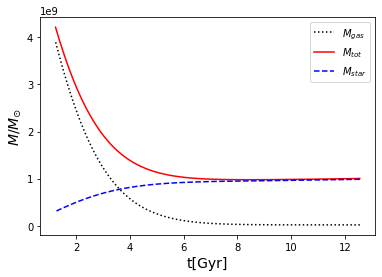

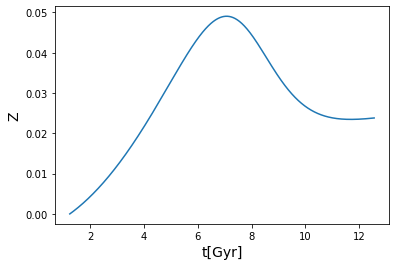

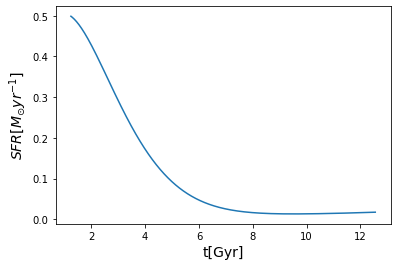

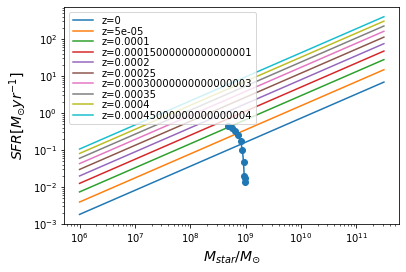

In [12]:
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

y_z=0.07
f_b=0.2
R=0.46
m=0.3
g=0.7
h_0=0.7
a_0=1.0/1.0
M_vir_0=60758265628.2
M_gas_0=17610972.0767
M_tot_0=1003534841.64
Z_0=0.0238180163786
S_0=1
B_0=1
n=3000#integral
#define lookback time[Gyr] using the second method
def f(z):
	s=1/((1+z)*math.sqrt(((1+z)**2)*(1+m*z)-z*(2+z)*g))
	return s
def lookbacktime(z):
	h=(z-0)/(2.0000000*n)
	F0=f(0)+f(z)
	F1=0
	F2=0
	for j in range(1,2*n):
		x=j*h
		if j%2 == 0:
			F2=F2+f(x)
		else:
			F1=F1+f(x)
	return ((h/3)*(F0+(2*F2)+(4*F1)))*9.78*(10**9)/h_0/(10**9)#[Gyr]
#define S(z)
def S(z):
	return S_0*((1+z)**(-1.5))
#define B(z)
def B(z):
	return B_0*((1+z)**1)
#define M_vir(z)
def M_vir(z):
	return M_vir_0*math.exp(0-8.2*a_0/13.0+8.2/(13.0*(1+z)))
#get an array of Z
z_values=[0]
number=1
while number<=2000:
	z_values.append(0.00005*number)
	number+=1
number=1
while number<=2000:
	z_values.append(2000*0.00005+0.0001*number)
	number+=1
number=1
while number<=2000:
	z_values.append(2000*0.00005+0.0001*2000+0.00015*number)
	number+=1
number=1
while number<=2000:
	z_values.append(2000*0.00005+0.0001*2000+0.00015*2000+0.0002*number)
	number+=1
number=1
while number<=2000:
	z_values.append(2000*0.00005+0.0001*2000+0.00015*2000+0.0002*2000+0.0005*number)
	number+=1
number=1
while number<=1000:
	z_values.append(2000*0.00005+0.001*200+0.0015*200+0.002*200+0.005*200+0.001*number)
	number+=1
number=1
while number<=1500:
	z_values.append(200*0.0005+0.001*200+0.0015*200+0.002*200+0.005*200+0.01*100+0.002*number)
	number+=1
#print(z_values)
#get an array of t
t_values=[lookbacktime(6)-lookbacktime(z) for z in z_values]
#print(t_values)
#get an array of S
S_values=[S(z) for z in z_values]
#get an array of B
B_values=[B(z) for z in z_values]
#get an array of M_vir
M_vir_values=[M_vir(z) for z in z_values]


num=12500
#print(M_vir_values)
#calculate delta_M_vir
delta_M_vir_values=[]
number=0
while number<=num-1:
	delta_M_vir_values.append(M_vir_values[number+1]-M_vir_values[number])
	number+=1
#print(delta_M_vir_values)
#calculate delta_M_infall
delta_M_infall_values=[]
number=0
while number<=num-1:
	result=0.01*delta_M_vir_values[number]
	delta_M_infall_values.append(result)
	number+=1
#calculat M_gas
M_gas_values=[M_gas_0]
number=0
while number<=num-1:
	result1=0-(1-R+B_values[number])*S_values[number]*M_gas_values[number]*(t_values[number+1]-t_values[number])+delta_M_infall_values[number]
	result2=M_gas_values[number]+result1
	M_gas_values.append(result2)
	number+=1

#calculate M_tot
M_tot_values=[M_tot_0]
number=0
while number<=num-1:
	result1=delta_M_infall_values[number]-B_values[number]*S_values[number]*M_gas_values[number]*(t_values[number+1]-t_values[number])
	result2=M_tot_values[number]+result1
	M_tot_values.append(result2)
	number+=1

#calculate Z
Z_values=[Z_0]
number=0
while number<=num-1:
	result1=y_z*(1-R)*S_values[number]*(t_values[number+1]-t_values[number])-(Z_values[number]*delta_M_infall_values[number]/M_gas_values[number])
	result2=Z_values[number]+result1
	Z_values.append(result2)
	number+=1

#calculate M_star
M_star_values=[]
number=0
while number<=num:
	M_star_values.append(M_tot_values[number]-M_gas_values[number])
	number+=1

#calculate SFR
SFR_values=[]
number=0
while number<=num:
	SFR_values.append(S_values[number]*M_gas_values[number]/(10**9))
	number+=1
print(number)
#judgment
number=0
while number<=num:
	if M_star_values[number]>0 and Z_values[number]>0:
		number+=1
	else:
		break
judge_number=number-1
print(M_vir_values[judge_number])
print(M_gas_values[judge_number])
print(M_tot_values[judge_number])
print(Z_values[judge_number])

#figure
#M
plt.figure('The first figure')
plt.plot(t_values[0:judge_number],M_gas_values[0:judge_number],color="black",linestyle=":",label='${M_{gas}}$')
plt.plot(t_values[0:judge_number],M_tot_values[0:judge_number],color="red",linestyle="-",label='${M_{tot}}$')
plt.plot(t_values[0:judge_number],M_star_values[0:judge_number],color="blue",linestyle="--",label='${M_{star}}$')
plt.xlabel("t[Gyr]",fontsize=14)
plt.ylabel("${M}$/${M_{\odot}}$",fontsize=14)
plt.legend(loc=1)

#Z
plt.figure('The second figure')
plt.plot(t_values[0:judge_number],Z_values[0:judge_number])
plt.xlabel("t[Gyr]",fontsize=14)
plt.ylabel("Z",fontsize=14)


#SFR
plt.figure('The third figure')
plt.plot(t_values[0:judge_number],SFR_values[0:judge_number])
plt.xlabel("t[Gyr]",fontsize=14)
plt.ylabel("${SFR}$${[M_{\odot}yr^{-1}]}$",fontsize=14)

#Main sequence
A_11=3.24 #M_sun/yr
beta=-0.35
alpha=3.45

def SFR(M_star,z):
	s=A_11*((M_star*1.00/(10**11))**(1+beta))*((1+z)**alpha)
	return s

z_values_obs=[0.0,0.25,0.5001,0.7500000000000001,1.0,1.25,1.5,1.75,2.0,2.25,2.5]

M_star_values_obs=[10**6,10**6.5,10**7,10**7.5,10**8,10**8.5,10**9,10**9.5,10**10,10**10.5,10**11,10**11.5]

def find(list,a):
    for i in range(0,len(list)):
        if list[i]==a:
            return i

plt.figure('The fourth figure')
number=0
SFR_values_obs=[]
while number<=9:
	SFR_values_obs=[SFR(M_star,z_values_obs[number]) for M_star in M_star_values_obs]
	plt.loglog(M_star_values_obs,SFR_values_obs,label='z='+str(z_values[number]))
	number+=1

number=0
M_star_values_model=[]
SFR_values_model=[]
while number<=9:
	index_find=find(z_values,z_values_obs[number])
	M_star_values_model.append(M_star_values[index_find])
	SFR_values_model.append(SFR_values[index_find])
	number+=1
plt.loglog(M_star_values_model,SFR_values_model,'-o')

plt.xlabel("${M_{star}}$/${M_{\odot}}$",fontsize=14)
plt.ylabel("${SFR}$${[M_{\odot}yr^{-1}]}$",fontsize=14)
plt.legend(loc=2,labelspacing=0.05)



